In [502]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


In [503]:
acoes = {
    'ITAUSA':yf.Ticker('ITSA4.SA'),
    'VALE':yf.Ticker('VALE3.SA'),
    'B3':yf.Ticker('B3SA3.SA'),
    'FLEURY':yf.Ticker('FLRY3.SA'),
    'BANCO DO BRASIL':yf.Ticker('BBAS3.SA'),
    'HYPERA':yf.Ticker('HYPE3.SA'),
    'RAIA DROGASIL':yf.Ticker('RADL3.SA'),
    'WEG':yf.Ticker('WEGE3.SA'),
    'PETROBRAS':yf.Ticker('PETR4.SA'),
    'ALUPAR':yf.Ticker('ALUP11.SA'),
    'COPEL':yf.Ticker('CPLE6.SA'),
    'MULTIPLAN':yf.Ticker('MULT3.SA'),
    'TELEFÔNICA':yf.Ticker('VIVT3.SA'),
    'AMBEV':yf.Ticker('ABEV3.SA'),
    'ENGIE':yf.Ticker('EGIE3.SA'),
    'SABESP':yf.Ticker('SBSP3.SA'),
    'BTG PACTUAL':yf.Ticker('BPAC11.SA'),
    'BRF':yf.Ticker('BRFS3.SA'),
    'EZTEC':yf.Ticker('EZTC3.SA'),
    'AREZZO':yf.Ticker('ARZZ3.SA')
}

In [504]:
data_acoes = []
for acao in acoes:
    data = {}
    data['Ação'] = acao
    data['Valor investido'] = 1000
    data['Quantidade'] = data['Valor investido'] / acoes[acao].history(period='5y').iloc[0]['Close']
    data['Valor final'] = data['Quantidade'] * acoes[acao].history(period='5y').iloc[-1]['Close']
    data['Rentabilidade geral'] = (data['Valor final'] / data['Valor investido'] - 1)
    data['Valor por dia'] = data['Quantidade'] * acoes[acao].history(period='5y')['Close']
    data['Rentabilidade diária'] = data['Valor por dia'].ffill(axis=0).pct_change()
    data['Desvio padrão diário'] = data['Rentabilidade diária'].std()
    data['Índice Sharpee'] = data['Rentabilidade geral'] / data['Desvio padrão diário']
    data_acoes.append(data)

In [505]:
acoes_portifolio ={
    'TELEFÔNICA':yf.Ticker('VIVT3.SA'),
    'VALE':yf.Ticker('VALE3.SA'),
    'RAIA DROGASIL':yf.Ticker('RADL3.SA'),
    'FLEURY':yf.Ticker('FLRY3.SA'),
    'WEG':yf.Ticker('WEGE3.SA'),
    }


In [506]:
data_portifolio = []
for acao in acoes_portifolio:
    data = {}
    data['Ação'] = acao
    data['Valor investido'] = 1000
    data['Quantidade'] = data['Valor investido'] / acoes[acao].history(period='5y').iloc[0]['Close']
    data['Valor final'] = data['Quantidade'] * acoes[acao].history(period='5y').iloc[-1]['Close']
    data['Rentabilidade geral'] = (data['Valor final'] / data['Valor investido'] - 1)
    data['Valor por dia'] = data['Quantidade'] * acoes[acao].history(period='5y')['Close']
    data['Rentabilidade diária'] = data['Valor por dia'].ffill(axis=0).pct_change()
    data['Desvio padrão diário'] = data['Rentabilidade diária'].std()
    data['Índice Sharpee'] = data['Rentabilidade geral'] / data['Desvio padrão diário']
    data_portifolio.append(data)



In [507]:
portifolio = 0
for i in range(len(data_portifolio)):
    portifolio += data_portifolio[i]['Valor por dia']
portifolio

Date
2018-09-21 00:00:00-03:00     5000.000028
2018-09-24 00:00:00-03:00     4885.586559
2018-09-25 00:00:00-03:00     4910.278298
2018-09-26 00:00:00-03:00     4903.470030
2018-09-27 00:00:00-03:00     4959.700710
                                 ...     
2023-09-15 00:00:00-03:00    10110.698168
2023-09-18 00:00:00-03:00    10084.789436
2023-09-19 00:00:00-03:00    10085.337741
2023-09-20 00:00:00-03:00    10116.543291
2023-09-21 00:00:00-03:00     9944.965913
Name: Close, Length: 1240, dtype: float64

In [508]:
portifolio = 0
portifolio += data_acoes[12]['Valor por dia'] # TELEFÔNICA - Setor de telecomunicações
portifolio += data_acoes[1]['Valor por dia'] # VALE - Setor de mineração
portifolio += data_acoes[6]['Valor por dia'] # RAIA DROGASIL - Setor de farmácias
portifolio += data_acoes[3]['Valor por dia'] # FLEURY - Setor de laboratórios
portifolio += data_acoes[7]['Valor por dia'] # WEG - Setor de equipamentos eletrônicos

portifolio

Date
2018-09-21 00:00:00-03:00     4999.999875
2018-09-24 00:00:00-03:00     4885.585557
2018-09-25 00:00:00-03:00     4910.277965
2018-09-26 00:00:00-03:00     4903.469960
2018-09-27 00:00:00-03:00     4959.699699
                                 ...     
2023-09-15 00:00:00-03:00    10110.697779
2023-09-18 00:00:00-03:00    10084.789032
2023-09-19 00:00:00-03:00    10085.337334
2023-09-20 00:00:00-03:00    10116.542876
2023-09-21 00:00:00-03:00     9944.965500
Name: Close, Length: 1240, dtype: float64

In [509]:
df_corr = pd.DataFrame()
df_corr['Portifolio'] = portifolio.ffill(axis=0).pct_change() # Rentabilidade diária do portifolio
df_corr['ITAUSA'] = data_acoes[0]['Rentabilidade diária']
df_corr['VALE'] = data_acoes[1]['Rentabilidade diária'] # 2a ação do portifolio, pois tinha pouca correlação com a 1a
df_corr['B3'] = data_acoes[2]['Rentabilidade diária']
df_corr['FLEURY'] = data_acoes[3]['Rentabilidade diária'] # 4a ação do portifolio, pois tinha pouca correlação com as 3 primeiras
df_corr['BANCO DO BRASIL'] = data_acoes[4]['Rentabilidade diária']
df_corr['HYPERA'] = data_acoes[5]['Rentabilidade diária']
df_corr['RAIA DROGASIL'] = data_acoes[6]['Rentabilidade diária'] # 3a ação do portifolio, pois tinha pouca correlação com as 2 primeiras
df_corr['WEG'] = data_acoes[7]['Rentabilidade diária'] # 5a ação do portifolio, pois tinha pouca correlação com as 4 primeiras
df_corr['PETROBRAS'] = data_acoes[8]['Rentabilidade diária']
df_corr['ALUPAR'] = data_acoes[9]['Rentabilidade diária']
df_corr['COPEL'] = data_acoes[10]['Rentabilidade diária']
df_corr['MULTIPLAN'] = data_acoes[11]['Rentabilidade diária']
df_corr['TELEFÔNICA'] = data_acoes[12]['Rentabilidade diária'] # 1a ação do portifolio
df_corr['AMBEV'] = data_acoes[13]['Rentabilidade diária']
df_corr['ENGIE'] = data_acoes[14]['Rentabilidade diária']
df_corr['SABESP'] = data_acoes[15]['Rentabilidade diária']
df_corr['BTG PACTUAL'] = data_acoes[16]['Rentabilidade diária']
df_corr['BRF'] = data_acoes[17]['Rentabilidade diária'] # Não foi adicionada ao portifolio pois não é uma ação muito rentável
df_corr['EZTEC'] = data_acoes[18]['Rentabilidade diária']
df_corr['AREZZO'] = data_acoes[19]['Rentabilidade diária']

df_corr.corr().iloc[0] # Correlação do portifolio com as outras ações

Portifolio         1.000000
ITAUSA             0.553676
VALE               0.514218
B3                 0.594871
FLEURY             0.630083
BANCO DO BRASIL    0.504522
HYPERA             0.558496
RAIA DROGASIL      0.640062
WEG                0.839473
PETROBRAS          0.496429
ALUPAR             0.476176
COPEL              0.503957
MULTIPLAN          0.544096
TELEFÔNICA         0.550846
AMBEV              0.502276
ENGIE              0.510524
SABESP             0.469231
BTG PACTUAL        0.524071
BRF                0.392926
EZTEC              0.525627
AREZZO             0.511633
Name: Portifolio, dtype: float64

<Axes: title={'center': 'Correlação do Portifolio com as outras ações'}>

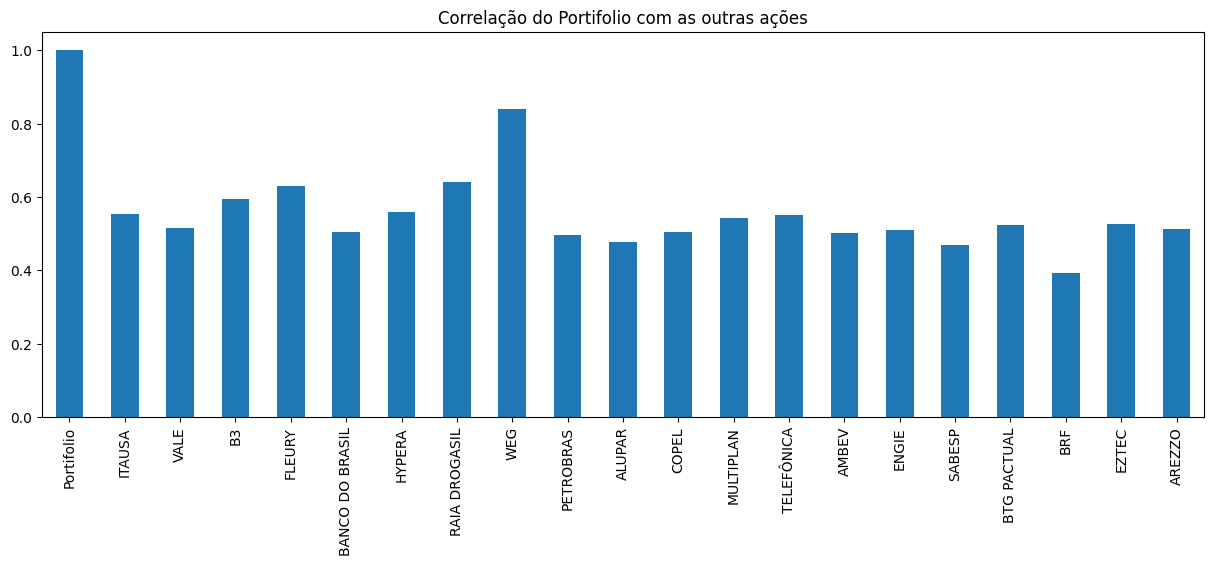

In [510]:
df_corr.corr().iloc[0].plot(kind='bar', figsize=(15,5), title='Correlação do Portifolio com as outras ações')

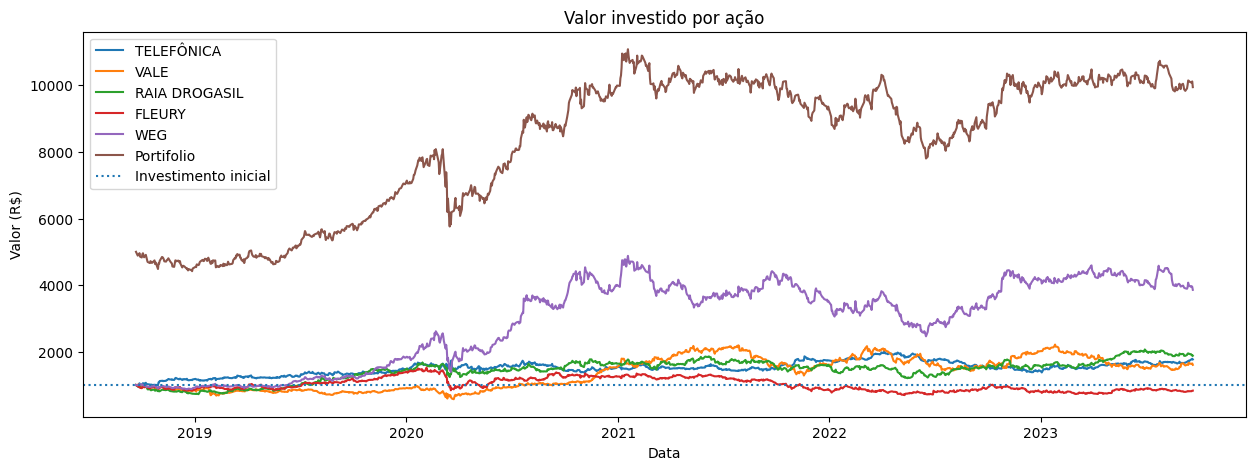

In [511]:
plt.figure(figsize=(15,5))
for i in range(len(data_portifolio)):
    plt.plot(data_portifolio[i]['Valor por dia'], label=data_portifolio[i]['Ação'])
plt.plot(portifolio, label='Portifolio')
plt.axhline(data['Valor investido'], linestyle=':', label='Investimento inicial')
plt.title('Valor investido por ação')
plt.ylabel('Valor (R\$)')
plt.xlabel('Data')
plt.legend()
plt.show()

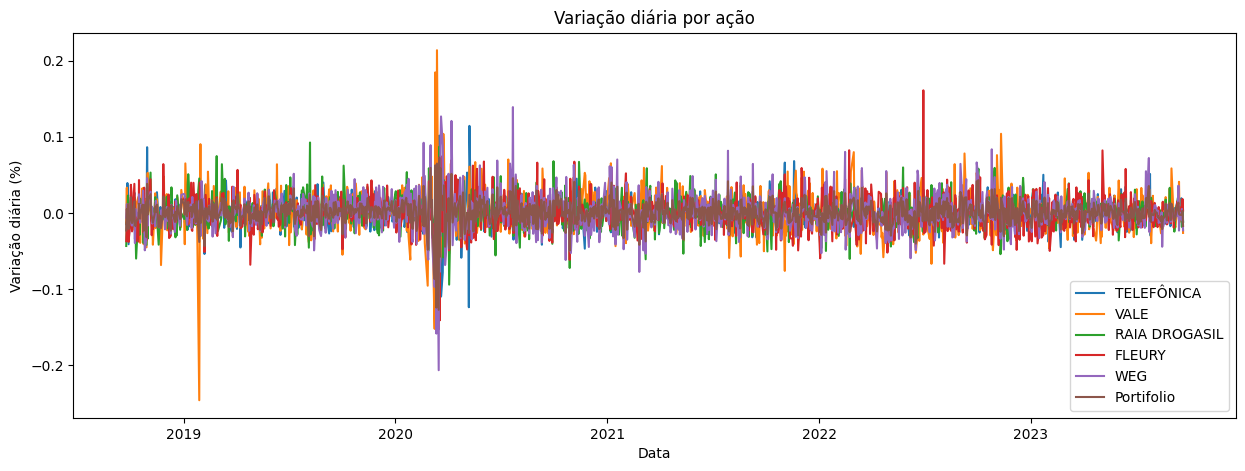

In [512]:
plt.figure(figsize=(15,5))
for i in range(len(data_portifolio)):
    plt.plot(data_portifolio[i]['Rentabilidade diária'], label=data_portifolio[i]['Ação'])
plt.plot(portifolio.ffill(axis=0).pct_change(), label='Portifolio')
plt.title('Variação diária por ação')
plt.ylabel('Variação diária (%)')
plt.xlabel('Data')
plt.legend()
plt.show()

In [513]:
for acao in data_portifolio:
    print(acao['Ação'])
    print('Valor investido: R$ {:.2f}'.format(acao['Valor investido']))
    print('Valor final: R$ {:.2f}'.format(acao['Valor final']))
    print('Rentabilidade geral: {:.2f}%'.format(acao['Rentabilidade geral'] * 100))
    print('Índice Sharpee: {:.2f}'.format(acao['Índice Sharpee']))
    print('')
print('Portifolio')
print('Valor investido: R$ {:.2f}'.format(1000 * len(data_portifolio)))
print('Valor final: R$ {:.2f}'.format(portifolio.iloc[-1]))
print('Rentabilidade geral: {:.2f}%'.format((portifolio.iloc[-1] / (1000 * len(data_portifolio)) - 1) * 100)) 
print('Índice Sharpee: {:.2f}'.format((portifolio.iloc[-1] / (1000 * len(data_portifolio)) - 1) / portifolio.ffill(axis=0).pct_change().std()))


TELEFÔNICA
Valor investido: R$ 1000.00
Valor final: R$ 1768.93
Rentabilidade geral: 76.89%
Índice Sharpee: 44.10

VALE
Valor investido: R$ 1000.00
Valor final: R$ 1606.00
Rentabilidade geral: 60.60%
Índice Sharpee: 23.62

RAIA DROGASIL
Valor investido: R$ 1000.00
Valor final: R$ 1880.33
Rentabilidade geral: 88.03%
Índice Sharpee: 43.29

FLEURY
Valor investido: R$ 1000.00
Valor final: R$ 831.75
Rentabilidade geral: -16.82%
Índice Sharpee: -7.56

WEG
Valor investido: R$ 1000.00
Valor final: R$ 3857.96
Rentabilidade geral: 285.80%
Índice Sharpee: 119.59

Portifolio
Valor investido: R$ 5000.00
Valor final: R$ 9944.97
Rentabilidade geral: 98.90%
Índice Sharpee: 66.04


In [514]:
portifolio = 0
portifolio += data_portifolio[0]['Valor por dia'] # TELEFÔNICA - Setor de telecomunicações
ind_sharpee_1_acao = (portifolio.iloc[-1] / (1000 * 1) - 1) / portifolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portifolio com 1 ação: {:.2f}'.format(ind_sharpee_1_acao))

media_ind_sharpee_1_acao = 0
for i in range(1):
    media_ind_sharpee_1_acao += data_portifolio[i]['Índice Sharpee']

Índice Sharpee do Portifolio com 1 ação: 44.10


In [515]:
portifolio += data_portifolio[1]['Valor por dia'] # VALE - Setor de mineração
ind_sharpee_2_acoes = (portifolio.iloc[-1] / (1000 * 2) - 1) / portifolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portifolio com 2 ações: {:.2f}'.format(ind_sharpee_2_acoes))

media_ind_sharpee_2_acoes = 0
for i in range(2):
    media_ind_sharpee_2_acoes += data_portifolio[i]['Índice Sharpee']
media_ind_sharpee_2_acoes /= 2

Índice Sharpee do Portifolio com 2 ações: 41.73


In [516]:
portifolio += data_portifolio[2]['Valor por dia'] # RAIA DROGASIL - Setor de farmácias
ind_sharpee_3_acoes = (portifolio.iloc[-1] / (1000 * 3) - 1) / portifolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portifolio com 3 ações: {:.2f}'.format(ind_sharpee_3_acoes))

media_ind_sharpee_3_acoes = 0
for i in range(3):
    media_ind_sharpee_3_acoes += data_portifolio[i]['Índice Sharpee']
media_ind_sharpee_3_acoes /= 3

Índice Sharpee do Portifolio com 3 ações: 53.30


In [517]:
portifolio += data_portifolio[3]['Valor por dia'] # FLEURY - Setor de laboratórios
ind_sharpee_4_acoes = (portifolio.iloc[-1] / (1000 * 4) - 1) / portifolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portifolio com 4 ações: {:.2f}'.format(ind_sharpee_4_acoes))

media_ind_sharpee_4_acoes = 0
for i in range(4):
    media_ind_sharpee_4_acoes += data_portifolio[i]['Índice Sharpee']
media_ind_sharpee_4_acoes /= 4

Índice Sharpee do Portifolio com 4 ações: 38.03


In [518]:
portifolio += data_portifolio[4]['Valor por dia'] # WEG - Setor de equipamentos eletrônicos
ind_sharpee_5_acoes = (portifolio.iloc[-1] / (1000 * 5) - 1) / portifolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portifolio com 5 ações: {:.2f}'.format(ind_sharpee_5_acoes))

media_ind_sharpee_5_acoes = 0
for i in range(5):
    media_ind_sharpee_5_acoes += data_portifolio[i]['Índice Sharpee']
media_ind_sharpee_5_acoes /= 5

Índice Sharpee do Portifolio com 5 ações: 66.04


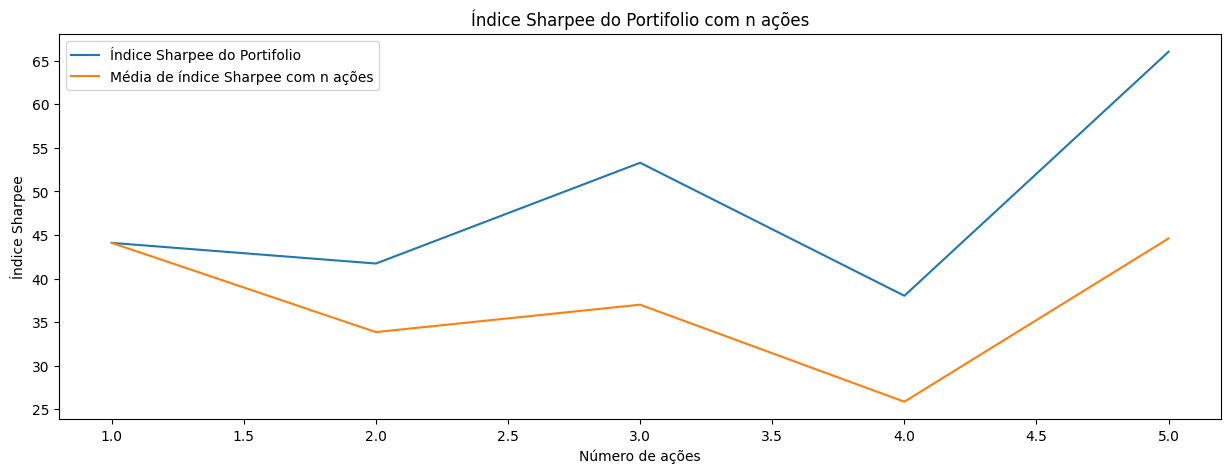

In [519]:
plt.figure(figsize=(15,5))
plt.plot([1,2,3,4,5], [ind_sharpee_1_acao, ind_sharpee_2_acoes, ind_sharpee_3_acoes, ind_sharpee_4_acoes, ind_sharpee_5_acoes], label='Índice Sharpee do Portifolio')
plt.plot([1,2,3,4,5], [media_ind_sharpee_1_acao, media_ind_sharpee_2_acoes, media_ind_sharpee_3_acoes, media_ind_sharpee_4_acoes, media_ind_sharpee_5_acoes], label='Média de índice Sharpee com n ações')
plt.legend()
plt.title('Índice Sharpee do Portifolio com n ações')
plt.ylabel('Índice Sharpee')
plt.xlabel('Número de ações')
plt.show()